In [172]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

import feature_match as fm

In [173]:
train_data = pd.read_csv('../Data/mnist/mnist_train.csv')
print(train_data.shape)

sorted_data = train_data.sort_values(by=['label'])

label_groups = sorted_data.groupby('label')

label_dfs = {label: group.copy() for label, group in label_groups}

df_label_0 = label_dfs[0]
df_label_1 = label_dfs[1]
df_label_2 = label_dfs[2]
df_label_3 = label_dfs[3]
df_label_4 = label_dfs[4]
df_label_5 = label_dfs[5]
df_label_6 = label_dfs[6]
df_label_7 = label_dfs[7]
df_label_8 = label_dfs[8]
df_label_9 = label_dfs[9]

#df_label_8.head()
df_label_0

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,pixel78,pixel79,pixel80,pixel81,pixel82,pixel83,pixel84,pixel85,pixel86,pixel87,pixel88,pixel89,pixel90,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100,pixel101,pixel102,pixel103,pixel104,pixel105,pixel106,pixel107,pixel108,pixel109,pixel110,pixel111,pixel112,pixel113,pixel114,pixel115,pixel116,pixel117,pixel118,pixel119,pixel120,pixel121,pixel122,pixel123,pixel124,pixel125,pixel126,pixel127,pixel128,pixel129,pixel130,pixel131,pixel132,pixel133,pixel134,pixel135,pixel136,pixel137,pixel138,pixel139,pixel140,pixel141,pixel142,pixel143,pixel144,pixel145,pixel146,pixel147,pixel148,pixel149,pixel150,pixel151,pixel152,pixel153,pixel154,pixel155,pixel156,pixel157,pixel158,pixel159,pixel160,pixel161,pixel162,pixel163,pixel164,pixel165,pixel166,pixel167,pixel168,pixel169,pixel170,pixel171,pixel172,pixel173,pixel174,pixel175,pixel176,pixel177,pixel178,pixel179,pixel180,pixel181,pixel182,pixel183,pixel184,pixel185,pixel186,pixel187,pixel188,pixel189,pixel190,pixel191,pixel192,pixel193,pixel194,pixel195,pixel196,pixel197,pixel198,pixel199,pixel200,pixel201,pixel202,pixel203,pixel204,pixel205,pixel206,pixel207,pixel208,pixel209,pixel210,pixel211,pixel212,pixel213,pixel214,pixel215,pixel216,pixel217,pixel218,pixel219,pixel220,pixel221,pixel222,pixel223,pixel224,pixel225,pixel226,pixel227,pixel228,pixel229,pixel230,pixel231,pixel232,pixel233,pixel234,pixel235,pixel236,pixel237,pixel238,pixel239,pixel240,pixel241,pixel242,pixel243,pixel244,pixel245,pixel246,pixel247,pixel248,pixel249,pixel250,pixel251,pixel252,pixel253,pixel254,pixel255,pixel256,pixel257,pixel258,pixel259,pixel260,pixel261,pixel262,pixel263,pixel264,pixel265,pixel266,pixel267,pixel268,pixel269,pixel270,pixel271,pixel272,pixel273,pixel274,pixel275,pixel276,pixel277,pixel278,pixel279,pixel280,pixel281,pixel282,pixel283,pixel284,pixel285,pixel286,pixel287,pixel288,pixel289,pixel290,pixel291,pixel292,pixel293,pixel294,pixel295,pixel296,pixel297,pixel298,pixel299,pixel300,pixel301,pixel302,pixel303,pixel304,pixel305,pixel306,pixel307,pixel308,pixel309,pixel310,pixel311,pixel312,pixel313,pixel314,pixel315,pixel316,pixel317,pixel318,pixel319,pixel320,pixel321,pixel322,pixel323,pixel324,pixel325,pixel326,pixel327,pixel328,pixel329,pixel330,pixel331,pixel332,pixel333,pixel334,pixel335,pixel336,pixel337,pixel338,pixel339,pixel340,pixel341,pixel342,pixel343,pixel344,pixel345,pixel346,pixel347,pixel348,pixel349,pixel350,pixel351,pixel352,pixel353,pixel354,pixel355,pixel356,pixel357,pixel358,pixel359,pixel360,pixel361,pixel362,pixel363,pixel364,pixel365,pixel366,pixel367,pixel368,pixel369,pixel370,pixel371,pixel372,pixel373,pixel374,pixel375,pixel376,pixel377,pixel378,pixel379,pixel380,pixel381,pixel382,pixel383,pixel384,pixel385,pixel386,pixel387,pixel388,pixel389,pixel390,pixel391,pixel392,pixel393,pixel394,pixel395,pixel396,pixel397,pixel398,pixel399,pixel400,pixel401,pixel402,pixel403,pixel404,pixel405,pixel406,pixel407,pixel408,pixel409,pixel410,pixel411,pixel412,pixel413,pixel414,pixel415,pixel416,pixel417,pixel418,pixel419,pixel420,pixel421,pixel422,pixel423,pixel424,pixel425,pixel426,pixel427,pixel428,pixel429,pixel430,pixel431,pixel432,pixel433,pixel434,pixel435,pixel436,pixel437,pixel438,pixel439,pixel440,pixel441,pixel442,pixel443,pixel444,pixel445,pixel446,pixel447,pixel448,pixel449,pixel450,pixel451,pixel452,pixel453,pixel454,pixel455

In [174]:
arr = [[row * 28 + col for col in range(28)] for row in range(28)]

# Print the result
for row in arr:
    print(row)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]
[28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55]
[56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83]
[84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111]
[112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139]
[140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167]
[168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195]
[196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 22

In [175]:
pixel_columns = df_label_0.columns[1:]
pixel_average = df_label_0[pixel_columns].mean(axis=0)

print(pixel_average.to_string())

pixel0        0.000000
pixel1        0.000000
pixel2        0.000000
pixel3        0.000000
pixel4        0.000000
pixel5        0.000000
pixel6        0.000000
pixel7        0.000000
pixel8        0.000000
pixel9        0.000000
pixel10       0.000000
pixel11       0.000000
pixel12       0.000000
pixel13       0.000000
pixel14       0.000000
pixel15       0.000000
pixel16       0.000000
pixel17       0.000000
pixel18       0.000000
pixel19       0.000000
pixel20       0.000000
pixel21       0.000000
pixel22       0.000000
pixel23       0.000000
pixel24       0.000000
pixel25       0.000000
pixel26       0.000000
pixel27       0.000000
pixel28       0.000000
pixel29       0.000000
pixel30       0.000000
pixel31       0.000000
pixel32       0.000000
pixel33       0.000000
pixel34       0.000000
pixel35       0.000000
pixel36       0.000000
pixel37       0.000000
pixel38       0.000000
pixel39       0.000000
pixel40       0.000000
pixel41       0.000000
pixel42       0.000000
pixel43    

In [176]:
target_features = [(15, 0, 25),
                   (16, 0, 25),
                   (43, 0, 50),
                   (44, 0, 50),
                   (71, 0, 50),
                   (72, 0, 50),
                   (99, 0, 100),
                   (100, 0, 100),
                   (127, 25, 255),
                   (128, 25, 255),
                   (155, 100, 255),
                   (156, 100, 255),
                   (183, 100, 255),
                   (184, 100, 255),
                   (211, 100, 255),
                   (212, 100, 255),
                   (239, 100, 255),
                   (240, 100, 255),
                   (267, 0, 100),
                   (268, 0, 100),
                   (295, 0, 100),
                   (296, 0, 100),
                   (323, 0, 100),
                   (324, 0, 100),
                   (351, 0, 100),
                   (352, 0, 100),
                   (379, 0, 100),
                   (380, 0, 100),
                   (407, 0, 50),
                   (408, 0, 50),
                   (435, 0, 50),
                   (436, 0, 50),
                   (463, 0, 50),
                   (464, 0, 50),
                   (491, 0, 50),
                   (492, 0, 50),
                   (519, 0, 100),
                   (520, 0, 100),
                   (547, 50, 255),
                   (548, 50, 255),
                   (575, 100, 255),
                   (576, 100, 255),
                   (603, 100, 255),
                   (604, 100, 255),
                   (631, 100, 255),
                   (632, 100, 255),
                   (659, 50, 150),
                   (660, 50, 150),
                   (687, 0, 100),
                   (688, 0, 100),
                   (715, 0, 50),
                   (716, 0, 50),
                   (743, 0, 50),
                   (744, 0, 50),
                   (772, 0, 25),
                   (772, 0, 25)
                ]

poisoned_data = fm.attack_mnist(aux_data = train_data, target_features = target_features, poison_rate = 1, target_label = 1)
# poisoned_data = fm.attack_mnist_with_replacement(train_data=train_data, aux_data=train_data, target_features=target_features, poison_rate=1, target_label=1)

In [177]:
print(poisoned_data.shape)
poisoned_data.head()

(1, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,pixel78,pixel79,pixel80,pixel81,pixel82,pixel83,pixel84,pixel85,pixel86,pixel87,pixel88,pixel89,pixel90,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100,pixel101,pixel102,pixel103,pixel104,pixel105,pixel106,pixel107,pixel108,pixel109,pixel110,pixel111,pixel112,pixel113,pixel114,pixel115,pixel116,pixel117,pixel118,pixel119,pixel120,pixel121,pixel122,pixel123,pixel124,pixel125,pixel126,pixel127,pixel128,pixel129,pixel130,pixel131,pixel132,pixel133,pixel134,pixel135,pixel136,pixel137,pixel138,pixel139,pixel140,pixel141,pixel142,pixel143,pixel144,pixel145,pixel146,pixel147,pixel148,pixel149,pixel150,pixel151,pixel152,pixel153,pixel154,pixel155,pixel156,pixel157,pixel158,pixel159,pixel160,pixel161,pixel162,pixel163,pixel164,pixel165,pixel166,pixel167,pixel168,pixel169,pixel170,pixel171,pixel172,pixel173,pixel174,pixel175,pixel176,pixel177,pixel178,pixel179,pixel180,pixel181,pixel182,pixel183,pixel184,pixel185,pixel186,pixel187,pixel188,pixel189,pixel190,pixel191,pixel192,pixel193,pixel194,pixel195,pixel196,pixel197,pixel198,pixel199,pixel200,pixel201,pixel202,pixel203,pixel204,pixel205,pixel206,pixel207,pixel208,pixel209,pixel210,pixel211,pixel212,pixel213,pixel214,pixel215,pixel216,pixel217,pixel218,pixel219,pixel220,pixel221,pixel222,pixel223,pixel224,pixel225,pixel226,pixel227,pixel228,pixel229,pixel230,pixel231,pixel232,pixel233,pixel234,pixel235,pixel236,pixel237,pixel238,pixel239,pixel240,pixel241,pixel242,pixel243,pixel244,pixel245,pixel246,pixel247,pixel248,pixel249,pixel250,pixel251,pixel252,pixel253,pixel254,pixel255,pixel256,pixel257,pixel258,pixel259,pixel260,pixel261,pixel262,pixel263,pixel264,pixel265,pixel266,pixel267,pixel268,pixel269,pixel270,pixel271,pixel272,pixel273,pixel274,pixel275,pixel276,pixel277,pixel278,pixel279,pixel280,pixel281,pixel282,pixel283,pixel284,pixel285,pixel286,pixel287,pixel288,pixel289,pixel290,pixel291,pixel292,pixel293,pixel294,pixel295,pixel296,pixel297,pixel298,pixel299,pixel300,pixel301,pixel302,pixel303,pixel304,pixel305,pixel306,pixel307,pixel308,pixel309,pixel310,pixel311,pixel312,pixel313,pixel314,pixel315,pixel316,pixel317,pixel318,pixel319,pixel320,pixel321,pixel322,pixel323,pixel324,pixel325,pixel326,pixel327,pixel328,pixel329,pixel330,pixel331,pixel332,pixel333,pixel334,pixel335,pixel336,pixel337,pixel338,pixel339,pixel340,pixel341,pixel342,pixel343,pixel344,pixel345,pixel346,pixel347,pixel348,pixel349,pixel350,pixel351,pixel352,pixel353,pixel354,pixel355,pixel356,pixel357,pixel358,pixel359,pixel360,pixel361,pixel362,pixel363,pixel364,pixel365,pixel366,pixel367,pixel368,pixel369,pixel370,pixel371,pixel372,pixel373,pixel374,pixel375,pixel376,pixel377,pixel378,pixel379,pixel380,pixel381,pixel382,pixel383,pixel384,pixel385,pixel386,pixel387,pixel388,pixel389,pixel390,pixel391,pixel392,pixel393,pixel394,pixel395,pixel396,pixel397,pixel398,pixel399,pixel400,pixel401,pixel402,pixel403,pixel404,pixel405,pixel406,pixel407,pixel408,pixel409,pixel410,pixel411,pixel412,pixel413,pixel414,pixel415,pixel416,pixel417,pixel418,pixel419,pixel420,pixel421,pixel422,pixel423,pixel424,pixel425,pixel426,pixel427,pixel428,pixel429,pixel430,pixel431,pixel432,pixel433,pixel434,pixel435,pixel436,pixel437,pixel438,pixel439,pixel440,pixel441,pixel442,pixel443,pixel444,pixel445,pixel446,pixel447,pixel448,pixel449,pixel450,pixel451,pixel452,pixel453,pixel454,pixel455

In [145]:
# data = np.array(poisoned_data)
data = np.array(train_data)
m, n = data.shape
np.random.shuffle(data)

val_data = data[0:1000].T
Y_val = val_data[0]
X_val = val_data[1:n]
X_val = X_val / 255

train_data = data[1000:m].T
Y_train = train_data[0]
X_train = train_data[1:n]
X_train = X_train / 255
_, m_train = X_train.shape

In [146]:
def initialise_parameters():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5

    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

def forward_propagation(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)

    return Z1, A1, Z2, A2

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def ReLU_derivative(Z):
    return Z > 0

def backward_propagation(Z1, A1, Z2, A2, W1, W2, X, Y):
    m = Y.size
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_derivative(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)

    return dW1, db1, dW2, db2

def update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2

    return W1, b1, W2, b2

In [147]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

In [148]:
def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = initialise_parameters()

    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_propagation(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_propagation(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)

        if i % 10 == 0:
            print(f'Iteration: {i}')
            predictions = get_predictions(A2)
            print(f'Accuracy: {get_accuracy(predictions, Y)}')

    return W1, b1, W2, b2

In [149]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

Iteration: 0
[9 9 7 ... 7 7 7] [0 4 0 ... 2 0 1]
Accuracy: 0.10241463414634146
Iteration: 10
[9 9 2 ... 4 7 7] [0 4 0 ... 2 0 1]
Accuracy: 0.1844390243902439
Iteration: 20
[0 9 2 ... 4 4 7] [0 4 0 ... 2 0 1]
Accuracy: 0.2905853658536585
Iteration: 30
[0 9 0 ... 4 7 1] [0 4 0 ... 2 0 1]
Accuracy: 0.40912195121951217
Iteration: 40
[0 9 0 ... 7 7 1] [0 4 0 ... 2 0 1]
Accuracy: 0.4862439024390244
Iteration: 50
[0 9 0 ... 2 7 1] [0 4 0 ... 2 0 1]
Accuracy: 0.5491463414634147
Iteration: 60
[0 9 0 ... 2 0 1] [0 4 0 ... 2 0 1]
Accuracy: 0.5948048780487805
Iteration: 70
[0 9 0 ... 2 0 1] [0 4 0 ... 2 0 1]
Accuracy: 0.6289512195121951
Iteration: 80
[0 9 0 ... 2 0 1] [0 4 0 ... 2 0 1]
Accuracy: 0.6540975609756098
Iteration: 90
[0 9 0 ... 2 0 1] [0 4 0 ... 2 0 1]
Accuracy: 0.6757073170731708
Iteration: 100
[0 9 0 ... 2 0 1] [0 4 0 ... 2 0 1]
Accuracy: 0.6929756097560975
Iteration: 110
[0 4 0 ... 2 0 1] [0 4 0 ... 2 0 1]
Accuracy: 0.7060243902439024
Iteration: 120
[0 4 0 ... 2 0 1] [0 4 0 ... 2 0 1

In [150]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_propagation(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)

    return predictions

def test_prediction(index, W1, b1, W2, b2):
    image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]

    print(f'Prediction: {prediction}')
    print(f'Label: {label}')

    image = image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(image, interpolation='nearest')
    plt.show()

Prediction: [0]
Label: 0


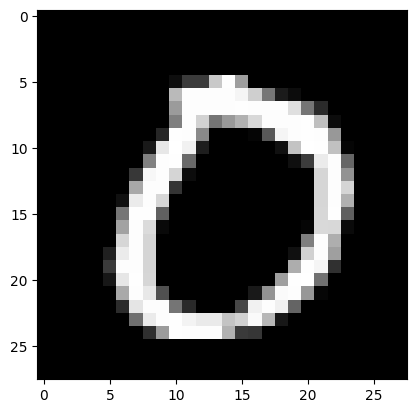

Prediction: [8]
Label: 8


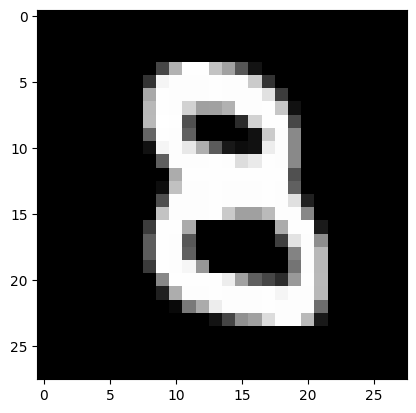

Prediction: [1]
Label: 1


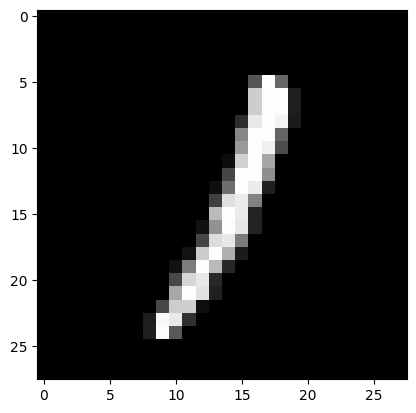

Prediction: [9]
Label: 2


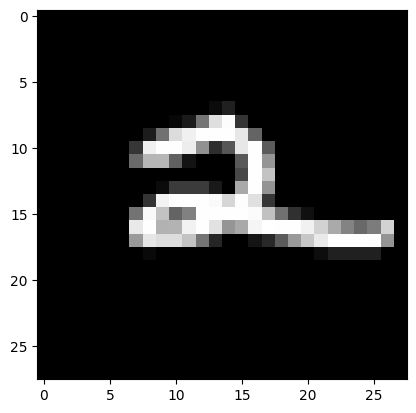

In [151]:
test_prediction(2, W1, b1, W2, b2)
test_prediction(86, W1, b1, W2, b2)
test_prediction(634, W1, b1, W2, b2)
test_prediction(356, W1, b1, W2, b2)

In [152]:
validation_predictions = make_predictions(X_val, W1, b1, W2, b2)
get_accuracy(validation_predictions, Y_val)

[5 1 8 3 0 4 9 1 7 8 8 3 4 4 7 4 6 1 2 9 1 9 3 1 1 4 7 8 9 0 9 7 1 6 6 6 8
 4 8 2 9 8 6 7 9 8 1 3 6 1 5 8 3 3 7 3 6 1 3 3 4 1 2 7 4 7 2 5 3 1 0 1 0 3
 8 8 4 8 7 6 9 4 9 5 0 2 1 8 0 3 3 1 4 6 2 0 8 4 3 2 1 1 4 8 3 4 2 4 5 4 2
 7 8 9 4 5 9 6 0 2 4 5 7 4 7 0 4 6 1 7 5 6 0 1 8 5 1 1 3 2 4 2 1 4 6 6 9 0
 9 0 1 8 4 8 1 2 8 0 6 9 1 8 1 8 9 9 6 7 6 1 2 4 7 6 2 1 9 5 4 7 6 5 0 0 9
 6 4 1 7 9 3 5 1 3 4 2 1 8 0 0 0 7 8 9 1 1 4 0 1 8 2 6 8 2 4 0 7 0 3 1 2 1
 3 6 9 9 1 5 2 9 9 8 2 1 1 7 9 2 6 3 1 0 9 9 8 0 7 6 9 6 6 2 2 3 3 9 8 2 3
 6 9 1 9 6 8 1 4 4 7 1 0 5 0 8 0 6 6 6 1 2 2 4 4 2 4 0 7 8 9 1 5 2 4 2 5 6
 5 7 1 1 8 0 4 6 6 8 7 5 7 5 5 6 2 8 1 7 5 9 7 6 4 2 4 2 4 7 0 9 6 4 7 0 1
 3 0 9 2 6 3 1 6 3 6 6 2 0 0 5 4 5 1 8 0 5 0 8 1 4 5 9 8 9 5 5 2 8 9 2 8 3
 3 7 3 6 9 6 4 0 9 2 3 4 2 8 2 5 9 0 1 9 9 0 8 3 6 2 2 1 7 7 6 9 9 6 5 6 1
 2 2 2 5 8 1 1 8 6 3 3 0 0 7 0 2 6 7 1 4 6 0 9 9 0 4 7 2 8 1 5 1 6 3 5 6 1
 8 7 1 3 4 0 3 2 5 1 9 9 8 0 7 8 7 5 0 4 5 6 9 4 4 0 3 9 0 5 1 0 3 4 1 1 0
 9 3 6 2 5 7 1 1 3 9 9 6 

0.854

In [153]:
zeros_data = np.array(df_label_0)
m, n = data.shape

zeros = zeros_data.T
Y_val = zeros[0]
X_val = zeros[1:n]
X_val = X_val / 255

zeros_predictions = make_predictions(X_val, W1, b1, W2, b2)
get_accuracy(zeros_predictions, Y_val)

[0 0 0 ... 0 0 0] [0 0 0 ... 0 0 0]


0.9467570183930301

In [154]:
ones_data = np.array(df_label_1)
m, n = data.shape

ones = ones_data.T
Y_val = ones[0]
X_val = ones[1:n]
X_val = X_val / 255

ones_predictions = make_predictions(X_val, W1, b1, W2, b2)
get_accuracy(ones_predictions, Y_val)

[1 1 1 ... 1 1 1] [1 1 1 ... 1 1 1]


0.9570879590093937

In [155]:
twos_data = np.array(df_label_2)
m, n = data.shape

twos = twos_data.T
Y_val = twos[0]
X_val = twos[1:n]
X_val = X_val / 255

twos_predictions = make_predictions(X_val, W1, b1, W2, b2)
get_accuracy(twos_predictions, Y_val)

[2 2 2 ... 2 2 2] [2 2 2 ... 2 2 2]


0.8407948288245152

In [156]:
threes_data = np.array(df_label_3)
m, n = data.shape

threes = threes_data.T
Y_val = threes[0]
X_val = threes[1:n]
X_val = X_val / 255

threes_predictions = make_predictions(X_val, W1, b1, W2, b2)
get_accuracy(threes_predictions, Y_val)

[5 3 3 ... 3 3 2] [3 3 3 ... 3 3 3]


0.8490002298322225

In [157]:
fours_data = np.array(df_label_4)
m, n = data.shape

fours = fours_data.T
Y_val = fours[0]
X_val = fours[1:n]
X_val = X_val / 255

fours_predictions = make_predictions(X_val, W1, b1, W2, b2)
get_accuracy(fours_predictions, Y_val)

[4 4 4 ... 4 4 4] [4 4 4 ... 4 4 4]


0.8612475442043221

In [158]:
fives_data = np.array(df_label_5)
m, n = data.shape

fives = fives_data.T
Y_val = fives[0]
X_val = fives[1:n]
X_val = X_val / 255

fives_predictions = make_predictions(X_val, W1, b1, W2, b2)
get_accuracy(fives_predictions, Y_val)

[6 5 2 ... 5 5 5] [5 5 5 ... 5 5 5]


0.7019762845849803

In [159]:
sixes_data = np.array(df_label_6)
m, n = data.shape

sixes = sixes_data.T
Y_val = sixes[0]
X_val = sixes[1:n]
X_val = X_val / 255

sixes_predictions = make_predictions(X_val, W1, b1, W2, b2)
get_accuracy(sixes_predictions, Y_val)

[6 6 6 ... 6 6 6] [6 6 6 ... 6 6 6]


0.9062122310853276

In [160]:
sevens_data = np.array(df_label_7)
m, n = data.shape

sevens = sevens_data.T
Y_val = sevens[0]
X_val = sevens[1:n]
X_val = X_val / 255

sevens_predictions = make_predictions(X_val, W1, b1, W2, b2)
get_accuracy(sevens_predictions, Y_val)

[1 7 7 ... 7 7 7] [7 7 7 ... 7 7 7]


0.8570779368325381

In [161]:
eights_data = np.array(df_label_8)
m, n = data.shape

eights = eights_data.T
Y_val = eights[0]
X_val = eights[1:n]
X_val = X_val / 255

eights_predictions = make_predictions(X_val, W1, b1, W2, b2)
get_accuracy(eights_predictions, Y_val)

[8 8 0 ... 8 8 8] [8 8 8 ... 8 8 8]


0.7954713266059562

In [162]:
nines_data = np.array(df_label_9)
m, n = data.shape

nines = nines_data.T
Y_val = nines[0]
X_val = nines[1:n]
X_val = X_val / 255

nines_predictions = make_predictions(X_val, W1, b1, W2, b2)
get_accuracy(nines_predictions, Y_val)

[9 9 9 ... 9 9 9] [9 9 9 ... 9 9 9]


0.8027698185291309